# Тестирование инварианта для преобразования Фурье, частоты в Герцах

$\hat{f(\xi)} = \int_{-\infty}^{\infty}e^{-2\pi ix\xi}f(x)dx$,

инвариант: $f(x) = e^{-x^2\pi}$, константа: 1$

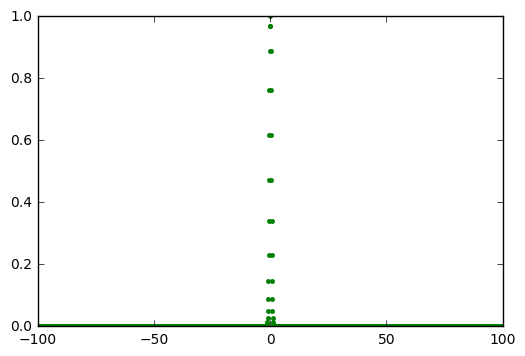

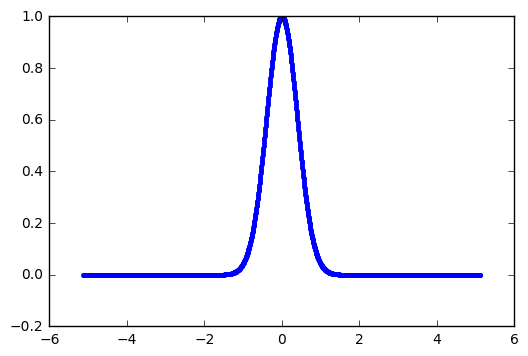

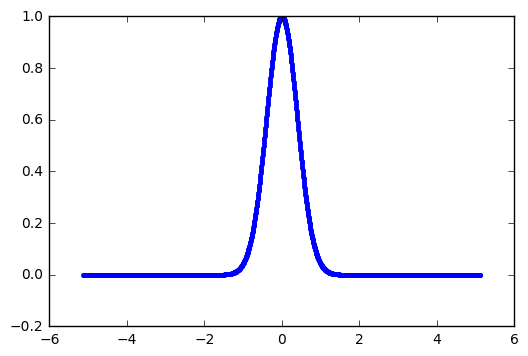

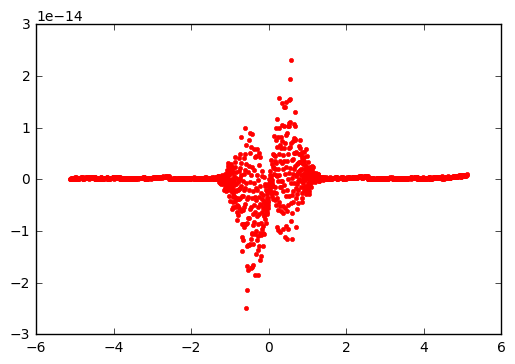

In [5]:
import numpy as np
from numpy import fft
from scipy import integrate
from matplotlib import pyplot as plt

M = 2**11
x_space = np.linspace(-100, 100, num = M, endpoint = False)
dx = abs(x_space[1] - x_space[0])
f = np.exp(- np.pi * (x_space * x_space))

plt.plot(x_space, f, 'g.')
plt.show()

f_hat = fft.fft(f)
xi_space = fft.fftfreq(M, d = dx)

offset_factor = np.exp(2*np.pi*1j* (M//2) * dx * xi_space )
         
f_hat = dx * offset_factor * f_hat

# Рисуем только те же значения xi, для которых мы определяли функцию по x, 
# чтобы сравнение картинок получилось наглядным
# Мы не использовали сдвиг ответа, но это то, что нужно сделать, если потом нужно применять не ifft

plt.plot(xi_space[(xi_space>-10) & (xi_space<10)], f_hat.real[(xi_space>-10) & (xi_space<10)], 'b.')
plt.show()

plt.plot(xi_space, f_hat.real, 'b.')
plt.show()

# мнимая часть мала, но есть. Можно раскомментировать, чтобы на неё посмотреть.
plt.plot(xi_space[(xi_space>-10) & (xi_space<10)], f_hat.imag[(xi_space>-10) & (xi_space<10)], 'r.')
plt.show()

Мы задаём промежуток от -10 до 10, на котором определяем функцию $f(x)$. Выбираем на промежутке $M+1$ точку, отбрасываем последнюю и смотрим на шаг по $x$, который обозначаем $dx$.

Считаем от набора, который представляет из себя эту функцию, библиотечное преобразование Фурье.

1. Известно, что оно не включает множитель $dx$, поэтому корректируем результат соответственно.

2. Определяем спектр частот и достаём массив $\xi_l$.

3. Для того, чтобы скорректировать сдвиг функции $f$ влево на $x_0 = \frac{M}{2} dx$, используя теорему о сдвиге, домножим результат на $e^{2\pi i (\frac{M}{2} dx) \xi_l }$  <span style="color:green">(формулировка: Для преобразования Фурье вида $\hat{f(\xi)} = \int_{-\infty}^{\infty}e^{-2\pi ix\xi}f(x)dx$ справедливо $\hat{f(x-x0)(\xi)} = e^{2\pi ix_0\xi}\hat{f(\xi)}$)</span>

4. Выберем нужное подмножество точек, чтобы увидеть сравнимые графики. Более точное сравнение включает интерполяцию, нежелательную для этого простого примера.

Замечание: разберёмся, куда девается множитель $\sqrt(\pi)$, который должен возникать при вычислении интеграла Пуассона. Короткий ответ - погашается обратным при замене.

Напомним, что

$$\hat{f(\xi)} = \int_{-\infty}^{\infty}e^{-2\pi ix\xi}f(x)dx$$, действуя на $f(x) = e^{-x^2\pi}$, принимает вид

$\hat{f(\xi)} = 
\int_{-\infty}^{\infty}e^{-2\pi ix\xi} e^{-x^2\pi}dx = 
\int_{-\infty}^{\infty}e^{-2\pi ix\xi - x^2\pi}dx = 
\int_{-\infty}^{\infty}e^{-x^2\pi - 2\pi ix\xi - (i\xi)^2\pi + (i\xi)^2\pi}dx = 
\int_{-\infty}^{\infty}e^{-(x\sqrt{\pi} + i\xi\sqrt{\pi})^2 - \xi^2\pi}dx = 
e^{-\xi^2\pi}\int_{-\infty}^{\infty}e^{-(x\sqrt{\pi} + i\xi\sqrt{\pi})^2}dx =
\color{blue}{// t = x\sqrt{\pi} + i\xi\sqrt{\pi}, dt = \sqrt{\pi}dx//}=
e^{-\xi^2\pi} \cdot \sqrt{\pi}$